In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as plt

In [4]:
df_C = pd.read_csv('Data/LS2_Customer_data - in.csv')
df_P = pd.read_csv('Data/LS2_Purchase_data - in.csv')

In [5]:
df_C.head()

,User_ID,annual_income,number_of_children,proximity_town
0,1000001,185,2,5.294648
1,1000002,185,0,NaN
2,1000003,185,1,0.321483
3,1000004,200,0,9.065729
4,1000005,200,1,8.198126


In [6]:
df_C.set_index('User_ID', inplace=True)

In [7]:
df_C.head()

,annual_income,number_of_children,proximity_town
User_ID,,,
1000001,185,2,5.294648
1000002,185,0,NaN
1000003,185,1,0.321483
1000004,200,0,9.065729
1000005,200,1,8.198126


In [8]:
df_C.shape

(5424, 3)

In [9]:
df_C.dtypes

annual_income           int64
number_of_children      int64
proximity_town        float64
dtype: object

In [10]:
df_C.describe()

,annual_income,number_of_children,proximity_town
count,5424.000000,5424.00000,5265.000000
mean,246.730273,0.96663,20.278161
std,96.511660,0.98401,20.698569
min,185.000000,0.00000,0.002735
25%,185.000000,0.00000,5.437241
50%,200.000000,1.00000,14.317117
75%,300.000000,2.00000,28.020375
max,900.000000,7.00000,185.273776


In [11]:
df_C['number_of_children'].value_counts()

0    2080
1    1954
2     995
3     293
4      93
5       7
7       1
6       1
Name: number_of_children, dtype: int64

In [12]:
df_C.rename(columns={'number_of_children': 'Num_Children'}, inplace=True)
df_C.head()

,annual_income,Num_Children,proximity_town
User_ID,,,
1000001,185,2,5.294648
1000002,185,0,NaN
1000003,185,1,0.321483
1000004,200,0,9.065729
1000005,200,1,8.198126


In [13]:
df_C.columns

Index(['annual_income', 'Num_Children', 'proximity_town'], dtype='object')

In [14]:
df_C.isnull().sum()

annual_income       0
Num_Children        0
proximity_town    159
dtype: int64

In [15]:
# to replace the NaN with the average distance from the town.

#df_C['proximity_town'].fillna(value-df['proximity_town'].mean())

In [16]:
#now we are looking at Purchaser data
df_P.shape

(50000, 13)

In [17]:
df_P.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
df_P.tail()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
49995,49995,1001649,P00102642,M,18-25,19,C,2,1,4,8.0,9.0,1374
49996,49996,1001649,P00035842,M,18-25,19,C,2,1,5,6.0,9.0,5372
49997,49997,1001649,P00052842,M,18-25,19,C,2,1,10,15.0,NaN,18879
49998,49998,1001649,P00183142,M,18-25,19,C,2,1,15,NaN,NaN,17029
49999,49999,1001650,P00155642,M,26-35,19,C,1,0,8,NaN,NaN,6093


In [19]:
df_P.columns

Index(['Unnamed: 0', 'User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase'],
      dtype='object')

In [20]:
df_P.describe()

,Unnamed: 0,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,34279.000000,15183.000000,50000.000000
mean,24999.500000,1.002553e+06,8.143420,0.409760,5.304600,9.869308,12.709478,9278.543340
std,14433.901067,1.787739e+03,6.587752,0.491794,3.718432,5.066454,4.122255,4953.748142
min,0.000000,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,12499.750000,1.001015e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5852.000000
50%,24999.500000,1.002103e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8045.000000
75%,37499.250000,1.004072e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12033.000000
max,49999.000000,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [21]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  50000 non-null  int64  
 1   User_ID                     50000 non-null  int64  
 2   Product_ID                  50000 non-null  object 
 3   Gender                      50000 non-null  object 
 4   Age                         50000 non-null  object 
 5   Occupation                  50000 non-null  int64  
 6   City_Category               50000 non-null  object 
 7   Stay_In_Current_City_Years  50000 non-null  object 
 8   Marital_Status              50000 non-null  int64  
 9   Product_Category_1          50000 non-null  int64  
 10  Product_Category_2          34279 non-null  float64
 11  Product_Category_3          15183 non-null  float64
 12  Purchase                    50000 non-null  int64  
dtypes: float64(2), int64(6), object

In [22]:
df_P.isna().sum()

Unnamed: 0                        0
User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            15721
Product_Category_3            34817
Purchase                          0
dtype: int64

In [23]:
#Now I am about to group by User_ID and see how much money they spent
UserID_grp = df_P.groupby(df_P['User_ID'], as_index=True)

In [24]:
UserID_grp.count()

,Unnamed: 0,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,,
1000001,5,5,5,5,5,5,5,5,5,3,2,5
1000002,5,5,5,5,5,5,5,5,5,4,1,5
1000003,4,4,4,4,4,4,4,4,4,3,0,4
1000004,4,4,4,4,4,4,4,4,4,4,2,4
1000005,8,8,8,8,8,8,8,8,8,3,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1006035,5,5,5,5,5,5,5,5,5,4,1,5
1006036,29,29,29,29,29,29,29,29,29,18,6,29
1006037,8,8,8,8,8,8,8,8,8,5,3,8


In [25]:
UserID_grp.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49949,49949,1001646,P00370642,M,26-35,20,B,1,1,8,16.0,NaN,9943
49950,49950,1001646,P00109542,M,26-35,20,B,1,1,8,14.0,17.0,9889
49993,49993,1001649,P00039742,M,18-25,19,C,2,1,5,NaN,NaN,1836
49994,49994,1001649,P00251242,M,18-25,19,C,2,1,5,11.0,NaN,5447


In [26]:
UserID_grp['Purchase'].sum()
#This is the ammount spent by each User_ID

User_ID
1000001     38891
1000002     37417
1000003     49947
1000004     66607
1000005     50684
            ...  
1006035     42357
1006036    196339
1006037     86597
1006039     50364
1006040     95780
Name: Purchase, Length: 5424, dtype: int64

In [27]:
df_C['Purchase'] = df_P.groupby(df_P['User_ID'])["Purchase"].sum()

#df.groupby('Date')['Data3'].transform('sum')

In [28]:

df_C.head()

,annual_income,Num_Children,proximity_town,Purchase
User_ID,,,,
1000001,185,2,5.294648,38891
1000002,185,0,NaN,37417
1000003,185,1,0.321483,49947
1000004,200,0,9.065729,66607
1000005,200,1,8.198126,50684


In [29]:
Gen = {'M': 0, 'F' : 1}
df_P.Gender = [Gen[item] for item in df_P.Gender]
df_P.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,4,1000002,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969


In [30]:
df_C['Gender'] = df_P.groupby(df_P['User_ID'])['Gender'].sum()

In [31]:
df_C


,annual_income,Num_Children,proximity_town,Purchase,Gender
User_ID,,,,,
1000001,185,2,5.294648,38891,5
1000002,185,0,NaN,37417,0
1000003,185,1,0.321483,49947,0
1000004,200,0,9.065729,66607,0
1000005,200,1,8.198126,50684,0
...,...,...,...,...,...
1001573,185,0,14.989070,19336,0
1001604,300,1,26.572296,47236,0
1001621,300,0,24.967998,7949,0


In [32]:
df_C['Marital'] = df_P.groupby(df_P['User_ID'])['Marital_Status'].sum()
df_C.head()

,annual_income,Num_Children,proximity_town,Purchase,Gender,Marital
User_ID,,,,,,
1000001,185,2,5.294648,38891,5,0
1000002,185,0,NaN,37417,0,0
1000003,185,1,0.321483,49947,0,0
1000004,200,0,9.065729,66607,0,4
1000005,200,1,8.198126,50684,0,8


In [33]:
df_C['Gender'] = df_C['Gender'].apply(lambda x: 'Female' if x > 0 else 'Male')
df_C.head()

,annual_income,Num_Children,proximity_town,Purchase,Gender,Marital
User_ID,,,,,,
1000001,185,2,5.294648,38891,Female,0
1000002,185,0,NaN,37417,Male,0
1000003,185,1,0.321483,49947,Male,0
1000004,200,0,9.065729,66607,Male,4
1000005,200,1,8.198126,50684,Male,8


In [34]:
df_C['Marital'] = df_C['Marital'].apply(lambda x: 'Married' if x > 0 else 'N/M')
df_C.head()

,annual_income,Num_Children,proximity_town,Purchase,Gender,Marital
User_ID,,,,,,
1000001,185,2,5.294648,38891,Female,N/M
1000002,185,0,NaN,37417,Male,N/M
1000003,185,1,0.321483,49947,Male,N/M
1000004,200,0,9.065729,66607,Male,Married
1000005,200,1,8.198126,50684,Male,Married


In [35]:
df_C['Mean'] = df_P.groupby(df_P['User_ID'])['Purchase'].mean()
df_C



,annual_income,Num_Children,proximity_town,Purchase,Gender,Marital,Mean
User_ID,,,,,,,
1000001,185,2,5.294648,38891,Female,N/M,7778.200000
1000002,185,0,NaN,37417,Male,N/M,7483.400000
1000003,185,1,0.321483,49947,Male,N/M,12486.750000
1000004,200,0,9.065729,66607,Male,Married,16651.750000
1000005,200,1,8.198126,50684,Male,Married,6335.500000
...,...,...,...,...,...,...,...
1001573,185,0,14.989070,19336,Male,N/M,6445.333333
1001604,300,1,26.572296,47236,Male,Married,9447.200000
1001621,300,0,24.967998,7949,Male,N/M,7949.000000


In [36]:
df_C['Max'] = df_P.groupby(df_P['User_ID'])['Purchase'].max()
df_C


,annual_income,Num_Children,proximity_town,Purchase,Gender,Marital,Mean,Max
User_ID,,,,,,,,
1000001,185,2,5.294648,38891,Female,N/M,7778.200000,15200
1000002,185,0,NaN,37417,Male,N/M,7483.400000,10074
1000003,185,1,0.321483,49947,Male,N/M,12486.750000,15424
1000004,200,0,9.065729,66607,Male,Married,16651.750000,19215
1000005,200,1,8.198126,50684,Male,Married,6335.500000,15665
...,...,...,...,...,...,...,...,...
1001573,185,0,14.989070,19336,Male,N/M,6445.333333,8748
1001604,300,1,26.572296,47236,Male,Married,9447.200000,16250
1001621,300,0,24.967998,7949,Male,N/M,7949.000000,7949


In [37]:
df_C['Min'] = df_P.groupby(df_P['User_ID'])['Purchase'].min()
df_C


,annual_income,Num_Children,proximity_town,Purchase,Gender,Marital,Mean,Max,Min
User_ID,,,,,,,,,
1000001,185,2,5.294648,38891,Female,N/M,7778.200000,15200,1057
1000002,185,0,NaN,37417,Male,N/M,7483.400000,10074,5260
1000003,185,1,0.321483,49947,Male,N/M,12486.750000,15424,7193
1000004,200,0,9.065729,66607,Male,Married,16651.750000,19215,15686
1000005,200,1,8.198126,50684,Male,Married,6335.500000,15665,3488
...,...,...,...,...,...,...,...,...,...
1001573,185,0,14.989070,19336,Male,N/M,6445.333333,8748,5216
1001604,300,1,26.572296,47236,Male,Married,9447.200000,16250,7066
1001621,300,0,24.967998,7949,Male,N/M,7949.000000,7949,7949


In [38]:
df_C.groupby(['Num_Children'])['Purchase'].mean()

Num_Children
0    90525.717308
1    79097.483112
2    87132.607035
3    89153.245734
4    81810.591398
5    82204.714286
6    51068.000000
7    23462.000000
Name: Purchase, dtype: float64

In [39]:
df_C.groupby(['Gender'])['Purchase'].mean()

Gender
Female    70437.329801
Male      91355.850537
Name: Purchase, dtype: float64

In [40]:
df_C.groupby(['Marital'])['Purchase'].mean()

Marital
Married    83997.029996
N/M        86634.748179
Name: Purchase, dtype: float64

In [41]:
df_C.groupby(['annual_income'])['Purchase'].mean()

annual_income
185     86199.414215
200     82906.848220
300     90636.737654
400     77210.518047
500     92785.985149
600     76627.000000
700     72014.700000
800    307488.666667
900     78268.500000
Name: Purchase, dtype: float64

In [42]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

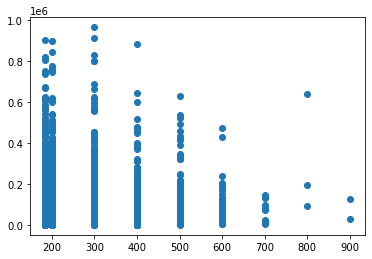

In [43]:
plt.scatter(df_C['annual_income'], df_C['Purchase'])
plt.show

In [44]:
df_P.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,2,1000001,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,4,1000002,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
df_P.groupby(['Occupation'])["Purchase"].mean()

Occupation
0     9088.680667
1     8898.382634
2     8922.414512
3     9367.816280
4     9285.446844
5     9508.883817
6     9515.435522
7     9521.855212
8     9651.200000
9     8802.629503
10    9151.980983
11    9245.725184
12    9942.537631
13    9507.981208
14    9333.935620
15    9648.668174
16    9225.325431
17    9809.277341
18    9112.569079
19    8972.831891
20    8656.215070
Name: Purchase, dtype: float64

In [50]:
df_P['Occupation'].value_counts()

4     6528
0     6476
7     5180
1     4192
17    3685
20    3278
12    2777
2     2398
14    2361
16    2320
3     1769
6     1706
10    1262
15    1106
11    1088
5      964
19     809
13     745
18     608
9      583
8      165
Name: Occupation, dtype: int64